In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
from scipy.constants import pi ,sigma,c,h,k

In [3]:
# Luminosity =  3.846e26
Lsun = 3.846e26
Rsun = 696340e3
Msun = 1989e30
lmbda1 = np.logspace(np.log10(4e-7), np.log10(7e-7), 900)
lmbdaUAV= np.logspace(np.log10(3e-7), np.log10(3.99e-7), 900)
logMarray = np.arange(-3,2,0.01)
Ms = 10**logMarray*Msun

In [4]:
def m_to_l(Mstar):
    if Mstar<0.43*Msun:
        Lstar = Lsun*0.23*(Mstar/Msun)**2.3
    elif 0.43*Msun<Mstar<2*Msun:
        Lstar = Lsun*(Mstar/Msun)**4
    elif 2*Msun<Mstar<55*Msun:
        Lstar = Lsun*1.4*(Mstar/Msun)**3.5
    elif Mstar>55*Msun:
        Lstar = Lsun*32000*(Mstar/Msun)
    return Lstar

In [5]:
xs = [m_to_l(Mstar) for Mstar in Ms]

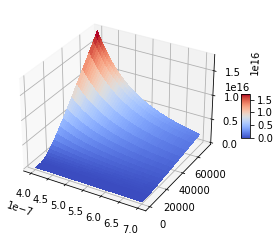

In [6]:
TemperatureofPlanet = 165 #Kelvin
Ds = []
Rs = []
Ts = []
all_Plancks = []
IntegralofIntensity1 = []
FluxPARArray = []
IntegralofIntensityUAV = []
all_PlancksUAV = []
FluxUAVarray = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(TemperatureofPlanet**4)*pi*sigma))
    Ds.append(D)
    Mstar = Msun*((Lstar/Lsun)**(1/3.5))
    if Mstar<Msun:
        Rstar = Rsun*(Mstar/Msun)**(0.8)
    else:
        Rstar = Rsun*(Mstar/Msun)**(0.57)
    Rs.append(Rstar)
    Tstar = (Lstar/(4*pi*(Rstar**2)*sigma))**(1/4)
    Ts.append(Tstar)
    def Planck(lmbda1):
        return ((2*h*c**2)/lmbda1**5)*(1/(np.exp(h*c/(k*Tstar*lmbda1))-1))
    plancks = []
    for lmbda in lmbda1:
        planck = Planck(lmbda)
        plancks.append(planck)
    IntegratedIntensity = 0
    #as integration will have one single value we will want one integration per Lstar
    for n in range(1, len(lmbda1)):
        dlmbda = lmbda1[n] - lmbda1[n-1]
        IntegratedIntensity = IntegratedIntensity + plancks[n]*dlmbda
    all_Plancks.append(plancks)
    IntegralofIntensity1.append(IntegratedIntensity)
    def PARLuminosity(IntegratedIntensity):
        return 4*(pi**2)*(Rstar**2)*IntegratedIntensity
    #we multiply by 2.1 as we convert from W/m^2 towards *micro moles per metre^2 per second*!
    FluxPAR = 4.6*(PARLuminosity(IntegratedIntensity))/(4*pi*D**2)
    FluxPARArray.append(FluxPAR)
    
    #my calculation for UVA but i called it UAV in my calculations
    plancksUAV = []
    for UAV in lmbdaUAV:
        planck = Planck(UAV)
        plancksUAV.append(planck)
    IntegratedIntensity2 = 0
        #as integration will have one single value we will want one integration per Lstar
    for n in range(1, len(lmbdaUAV)):
        dlmbda = lmbdaUAV[n] - lmbdaUAV[n-1]
        IntegratedIntensity2 = IntegratedIntensity2 + plancksUAV[n]*dlmbda
    all_PlancksUAV.append(plancksUAV)
    IntegralofIntensityUAV.append(IntegratedIntensity2)
    FluxUAV = (PARLuminosity(IntegratedIntensity2))/(4*pi*D**2)
    FluxUAVarray.append(FluxUAV)
    

#Because we substitute the values in the equation, we put the linspace part inside the x-axis
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(lmbda1, Ts)
surf = ax.plot_surface(X, Y, np.array(all_Plancks), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

[14195832.620876975, 14576755.52548086, 14967899.898816247, 15369540.017965885, 15781957.51980788, 16205441.598504283, 16640289.208288904, 17086805.271696713, 17545302.89338068, 18016103.579666074, 18499537.463996205, 18995943.53842754, 19505669.891336758, 20029073.95150618, 20566522.738758963, 21118393.12131959, 21685072.080080286, 22266956.979958642, 22864455.848536573, 23477987.66217624, 24107982.639813416, 24754882.544634253, 25419140.993847188, 26101223.776767027, 26801609.181434326, 27520788.32999909, 28259265.52310398, 29017558.593508482, 29796199.269202076, 30595733.54626088, 31416722.071709435, 32259740.53665589, 33125380.07997643, 34014247.70283186, 34926966.69430714, 35864177.06847235, 36826536.01317133, 37814718.35085307, 38829417.0117686, 39871343.519865505, 40941228.4917206, 42039822.14886067, 43167894.84383061, 44326237.600377664, 45515662.66813074, 46737004.092163675, 47991118.29784181, 49278884.691361964, 50601206.276407115, 51959010.2873478, 53353248.83943472, 5478489

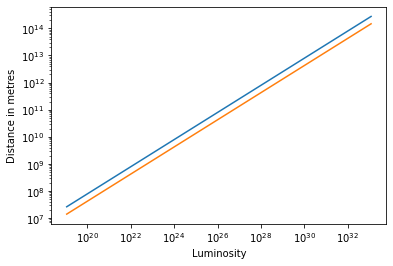

In [7]:
LiquidwaterTempLower = 273.15 #Kelvin
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempLower**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds)
plt.xscale("log")
plt.yscale("log")
LiquidwaterTempUpper = 373.15 #Kelvin
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempUpper**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds)
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Distance in metres')
plt.xlabel('Luminosity')
print(Ds)

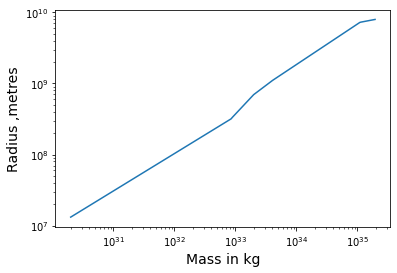

In [8]:
plt.plot(Ms, Rs)
plt.xlabel('Mass in kg', fontsize=14)
plt.ylabel('Radius ,metres',fontsize=14)
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Temperature in Kelvin')

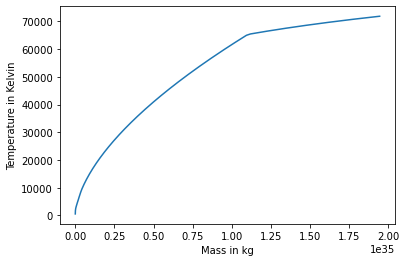

In [9]:
plt.plot(Ms, Ts)
plt.xlabel('Mass in kg')
plt.ylabel('Temperature in Kelvin')

Text(0, 0.5, 'Intensity')

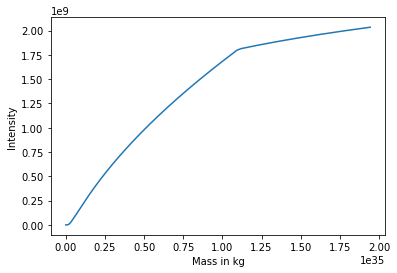

In [10]:
plt.plot(Ms, IntegralofIntensity1) 
plt.xlabel('Mass in kg')
plt.ylabel('Intensity')

In [11]:
print(PARLuminosity(IntegratedIntensity))   

5.082656832404608e+30


Text(0, 0.5, 'PAR flux, $\\mu$mol m$^{-2}$ s$^{-1}$')

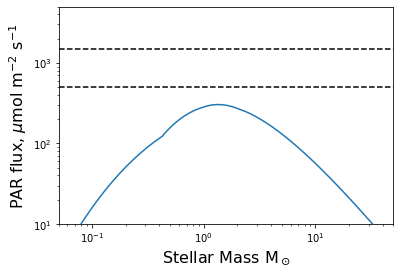

In [12]:
plt.plot(Ms/Msun, FluxPARArray)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.05, 50.)
plt.ylim(10., 5000.)
plt.axhline(500, color="black", linestyle="dashed")
plt.axhline(1500, color="black", linestyle="dashed")
plt.xlabel(r'Stellar Mass M$_\odot$', fontsize=16)
plt.ylabel(r'PAR flux, $\mu$mol m$^{-2}$ s$^{-1}$', fontsize=16)

Text(0, 0.5, 'UAV flux')

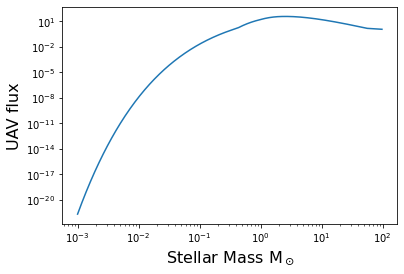

In [13]:
plt.plot(Ms/Msun, FluxUAVarray)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'Stellar Mass M$_\odot$', fontsize=16)
plt.ylabel(r'UAV flux', fontsize=16)

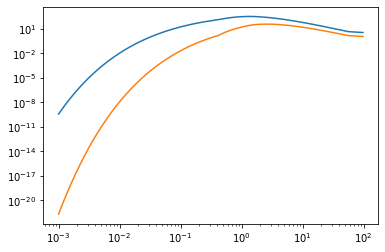

In [14]:
plt.plot(Ms/Msun, FluxPARArray)
plt.xscale("log")
plt.yscale("log")
plt.plot(Ms/Msun, FluxUAVarray)
plt.xscale("log")
plt.yscale("log")
# plt.xlabel(r'Stellar Mass M$_\odot$', fontsize=16)
# plt.ylabel(r'UAV flux', fontsize=16)

#very weird behaviour? comparable Flux at some point? A lot of questions